<font size=6>**ML Intro and Clustering**</font> </h6>

In this session we provide a short introduction to **Machine Learning**, and one of its applications, i.e. **Clustering**. <br>
The goals are:

- to get a grasp of what **machine learning** is 
- to show the basic concept of **data exploration** and **interpretation**
- to **use** clustering algorithms in a particular problem.


# A bit of introduction to ML


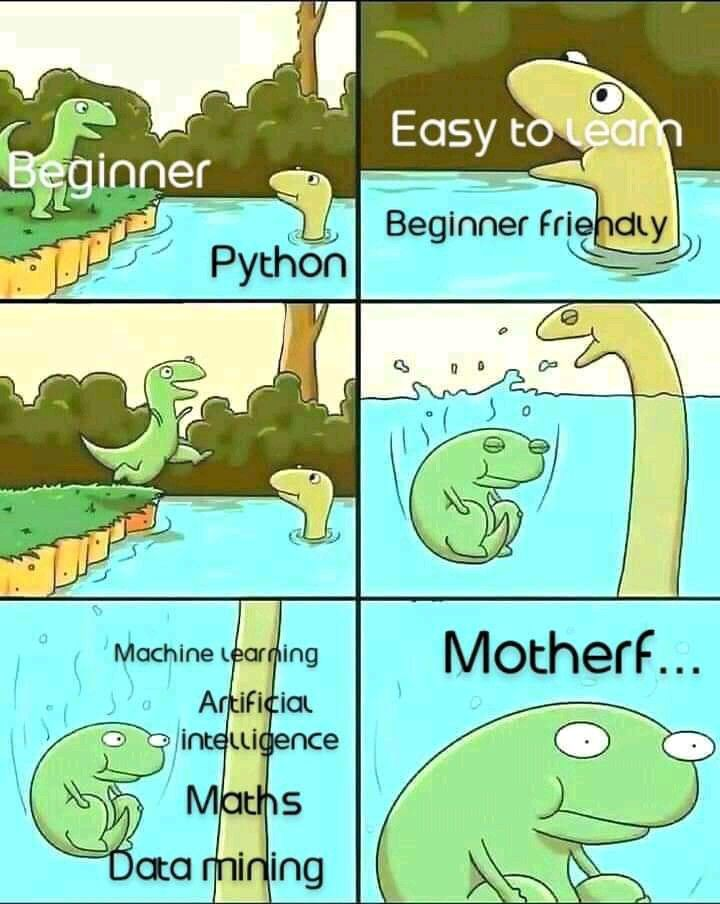

<center> Dive into Python and machine learning! (Source: <a href="https://www.pinterest.ca/pin/549861435766162430/"
 target="_blank" rel="noopener noreferrer"> pinterest random image</a>)</center>
    

## What is machine learning ?

Arthur Samuel (1959): 

>*"Field of study that gives computers the ability to learn without being explicitly programmed."*

## How did we get here? 

<center><img src="images/ml_history.png" width=800> 
    Figure 1.1. Timeline from Artificial Intelligence, to Machine Learning, and Deep learning.<br>
(Credit: <a href="https://blogs.nvidia.com/blog/2016/07/29/whats-difference-artificial-intelligence-machine-learning-deep-learning-ai/" target="_blank" rel="noopener noreferrer"> Nvidia blog - (an interesting read!</a>)</center>

## and ... why now? 

- More powerful, abundant, and cheap computation (CPUs/GPUs).
- Growing data sets.
- Advancements in underlying algorithms and implementation.

This is true for both everyday and Astronomy applications !

## ML branches

<center><img src="images/ml_branches.png" width=800> 
Figure 1.2. Branches and example applications of Machine Learning<br>
(Credit: <a href="https://www.cognub.com/index.php/cognitive-platform/"
 target="_blank" rel="noopener noreferrer"> CogHub</a>)</center>

- **Supervised**: Labelled data where the algorithms learn to predict the output from the input data.
- **Unsupervised**: Non-labelled data where the algorithms learn to identify structures from the input data.
- **Semi-supervised**: Some labelled data - most is not - and a mixture of supervised and unsupervised techniques can be implemented.

## Unsupervised approaches in particular:

- Clustering: discover groupings or/and structures in the data, i.e. concentrations of datapoints or overdensities (e.g. the locations of galaxies in a BPT diagram)
- Association:  discover the rule(s) describing between variables or features in a dataset (e.g. customer recommendations)
- Dimensionality reduction: tool to reduce the number of input variables or features in a dataset (the more you have the more challenging it becomes to build a predictive model - referred to as *curse of dimensionality*) - also usefulf for visualization purposes.  

## Pros 
+ They can make new discoveries, as often enough we don’t know what they’re looking for in data.
+ They do not require training, which saves (huge) time on producing labels (manual classification tasks such as spectroscopic classification).
+ It reduces the chance of human error and bias, which could occur during manual labeling processes.
+ Unlabeled data is much easier and faster to get.<br>

## Cons
- Output needs careful proper interpretation: 
    - the groups may not match informational classes
    - extra effort has to be made to validate the groups. 
- Less accurate predictive results, as the labels are not part of the process and the method has to learn it by itself. 
- More time is needed to train these algorithms:
    - they need time to analyze and calculate all possibilities
    - the deal with huge datases that may increase computational complexity.


## The most critical take-home points:

- No matter which algorithm you pick, the goal of ML is to make **predictions** and **classifications**.
- There is **no optimal** algorithm, it all depends on your specific problem!<details>
<summary>( Click for an illustration of this point )</summary>
<center><img src="images/my-precious-not.jpg"> 
Figure 3.1. There is not a single algorithm to rule them all !!!<br>
(Credit: <a href="https://knowyourmeme.com/memes/my-precious"
 target="_blank" rel="noopener noreferrer"> knowyourmeme.com</a>)</center>
</details>




# Clustering



    or: "What can data tell us ?"

## Selecting a tool - the K-means algorithm

The K-means algorithm tries to partition a sample of N observations (with each observation being a $d$-dimensional vector) into $k$ individual clusters $C_k$. 

We first need to find a metric, i.e. to define the **loss function**, which (in this case) is the within-cluster sum-of-squares of the observations:

$$ Loss = \sum_{k=1}^{K} \sum_{i \epsilon C_k} ||x_i-\mu_k||^2$$,

where $\mu_k=\frac{1}{N_k}\sum_{i \epsilon C_k} x_i$ is the mean/centroid of the $N_k$ points included in each of the $C_k$ clusters. 

The solution comes from **minimizing** the above function, i.e.: 

$$ min (Loss) = \min_{\mu_k} \left (  \sum_{k=1}^{K} \sum_{i \epsilon C_k} ||x_i-\mu_k||^2 \right )$$. 

**Steps**:
1. Initiate algorithm by selecting $k$ means <br>
    *e.g. select randomly $k$ observations as initial means - see also [Wiki:K-means initialization](http://en.wikipedia.org/wiki/K-means_clustering#Initialization_methods)*
2. Assign each observation to the nearest cluster
3. Calculate the new mean value for each cluster $C_k$ according to the new observations assiged
4. Repeat steps 2 and 3 up to the point that there are no updates in the assigments to the clusters.

<center><img src="images/kmeans.gif"> 
Figure 5.1. Evolution of K-means centroids through iterations. <br>
(Credit: <a href="https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/"  target="_blank" rel="noopener noreferrer">Clustering with Scikit with GIFs, by David Sheehan</a>)</center>


A globally optimal minimum is not guaranteed (might converge to a local minimum). This is highly dependent on the initialization of the centroids. This is why, in practice, K-means is run multiple times with different starting values selecting the result with the lowest sum-of-squares error. To improve on that we can initially select centroids that are generally distant from each other (sklearn implementation by using `init='k-means++'` parameter). For more see [Grouping data points with k-means clustering, by Jeremy Jordan](https://www.jeremyjordan.me/grouping-data-points-with-k-means-clustering/).

**Complexity**

$O(knT)$, where k, n and T are the number of clusters, samples and iterations, respectively.

**Pros**

- Simple and intuitive

**Cons**

- The number of clusters (K) must be provided (or cross-validated)
- There is an inherit assumption of isotropic clusters (i.e. not well fitted for elongated clusters, or manifolds with irregular shapes)
- Inertia is not a normalized metric: lower values are better , but as the dimensions increase so does the inertia

**An alternative for faster implementation - Mini Batch K-means**

For faster computations the sklearn offers the [Mini Batch K-means](http://scikit-learn.org/stable/modules/clustering.html#mini-batch-kmeans) method which simply breaks the initial set of observations/data points to smaller randomly selected subsamples.

For each subsample in the mini batch the assigned centroid is updated by taking into account the average of that subsample and all previous subsamples assigned to that centroid. This is repeated until the predefined number of iterations is reached. Its results are generally only slightly worse then the standard algorithm.

### Example use of K-means

In the following example we artificially create two groups of data and we use the K-means algorithm.

**Creating some data**

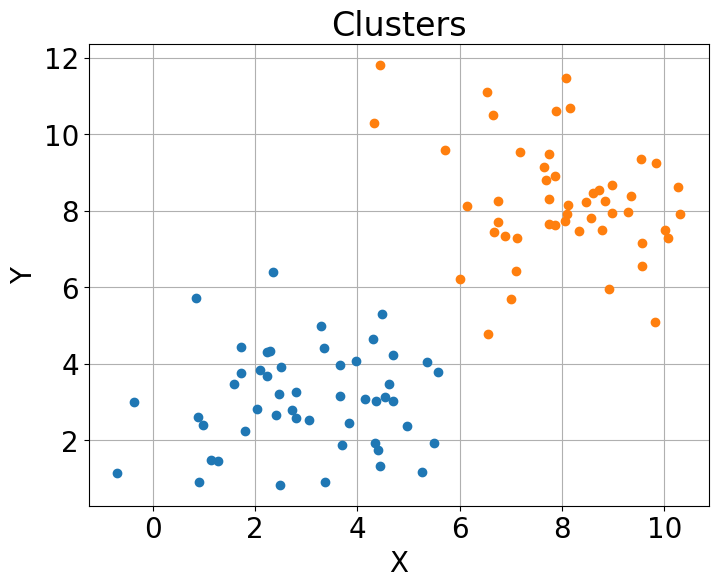

In [7]:
# imports and some handy function

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = [8, 6]

def add_plot_info():
    """Just add some information for the plot"""
    plt.title('Clusters')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
#    plt.legend()


# Set random seed for reproducibility
np.random.seed(2024)

# select number of samples/points per cluster
num_samples = 50

# Generate cluster 1 with normal distribution
cluster1_mean = [3, 3]
cluster1_cov = [[2, 0], [0, 2]]
cluster1_samples = np.random.multivariate_normal(cluster1_mean, 
                                                 cluster1_cov, 
                                                 num_samples)

# Generate cluster 2 with normal distribution
cluster2_mean = [8, 8]
cluster2_cov = [[2, 0], [ 0, 2]]
cluster2_samples = np.random.multivariate_normal(cluster2_mean, cluster2_cov, num_samples)

plt.plot(cluster1_samples[:,0],cluster1_samples[:,1], 
         'o', color='tab:blue', label='Cluster 1')

plt.plot(cluster2_samples[:,0],cluster2_samples[:,1], 
         'o', color='tab:orange', label='Cluster 2')

add_plot_info()    



The above plot is the result of the mock data creation. In reality what we would see is the following plot (i.e. only the data without any idea of the original group).

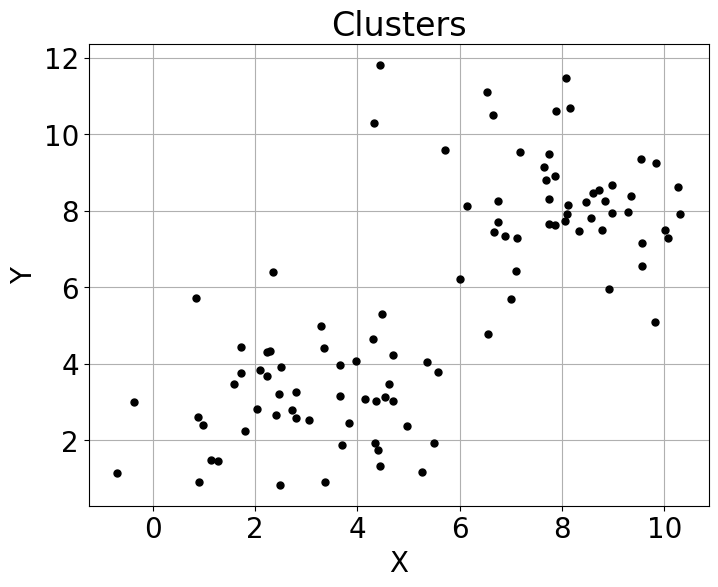

In [8]:
X = np.concatenate((cluster1_samples,cluster2_samples))

plt.plot(X[:,0], X[:,1] , '.k', ms=10) 

add_plot_info()


**Implementation**

Throughout the machine-learning part we will be using the [scikit-learn](https://scikit-learn.org/stable/index.html) module developed on top of `NumPy`, `SciPy`, and `matplotlib`, offering efficient tools on machine-learning applications, data mining, and data analysis. 

We will use [`sklearn.cluster.KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), for which the most important (currently) option is the number of groups (we **guess**). A valid option is of course 2.

/home/grigoris/miniconda3/envs/astrostat24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster centers:
[[3.01359977 3.07100913]
 [7.98933204 8.24966799]]

Real centers:
[3, 3] [8, 8]


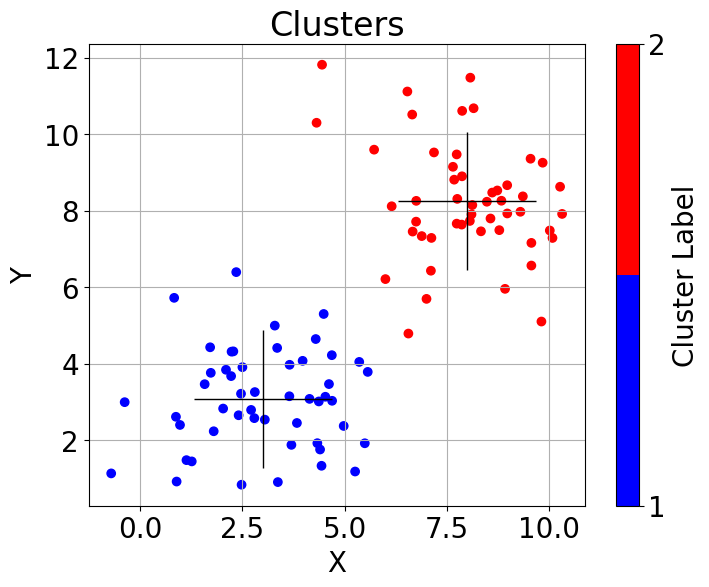

In [9]:
from sklearn.cluster import KMeans

# number of clusters
Clusters_kmeans = 2

# preparing the model with this number of clusters
kmeans_model = KMeans(n_clusters=Clusters_kmeans)
# fitting the model to the data
kmeans_model.fit( X )

# returning the cluster identified
print("Cluster centers:")
print(kmeans_model.cluster_centers_)

# comparing with the real ones
print()
print("Real centers:")
print(cluster1_mean, cluster2_mean)

# coordinates of the clusters for plotting
cc_x = kmeans_model.cluster_centers_[:,0]
cc_y = kmeans_model.cluster_centers_[:,1]

# plotting the centers
plt.plot(cc_x, cc_y, 'k+', ms=100)

# plotting the datapoints color-coded according 
# to the cluster they have been assigned to
new_map = matplotlib.cm.gray.from_list('clustering', ('blue', 'red'), N=Clusters_kmeans)
scat2 = plt.scatter( X[:,0], X[:,1], c=kmeans_model.labels_, edgecolors='face', cmap=new_map)
cb = plt.colorbar(scat2, ticks=range(0,Clusters_kmeans+1,1))   # number of clusters
cb.set_ticklabels(range(1,Clusters_kmeans+2,1))
cb.set_label('Cluster Label')

add_plot_info()

plt.show()

## Exercise: Play around with various clusters to see the reult of K-means

**TASKS**:

- Use the following function (cluster_generator) to create some clusters. It does it automatically for you so that **you do not know how many clusters it creates** (well... you can find out but you _shouldn't_!). It returns an array of positions for all samples from all clusters. 

- Plot the samples and guess the number of clusters. 

- Put this into K-means and run the algorithm. 

- Discuss with your partner what you notice. You can run it a few times.

In [11]:
def cluster_generator(num_samples=50, verbose=False):
    """ A function to automatically generate some clusters
    randomly. It returns one single datasets (points with 
    x and y) and the cluster centers. 
    
    num_samples: 50 , numper of points per cluster
    verbose: False , not printing any information on 
    the clusters.    
    """
    # automatically create a number of clusters in this range
    num_clusters = np.random.randint(3, 7)

    # select number of samples/points per cluster
    num_cluster_samples = num_samples

    # Generate clusters with normal distribution
    center_clusters = []    
    data_clusters = []
    for c in range(num_clusters):        
        cluster_mean = [np.random.randint(-10, 15), np.random.randint(-10, 15)]
#        print(cluster_mean)
        cluster_cov = [[2, 0], [0, 2]]
#        print(cluster_cov)
        cluster_samples = np.random.multivariate_normal(cluster_mean, 
                                                         cluster_cov, 
                                                         num_cluster_samples)
        data_clusters.append(cluster_samples)
        center_clusters.append(cluster_mean)    

        if verbose==True:
            print(cluster_mean)
            plt.scatter(cluster_samples[:,0],cluster_samples[:,1], label=f'Cluster {c}')
            
    
    data_clusters = np.concatenate(data_clusters, axis=0)
    print(center_clusters)
    return data_clusters, center_clusters

**generating data**

[[3, 9], [-8, 9], [11, 12], [-9, -4], [7, 3], [4, 1]]


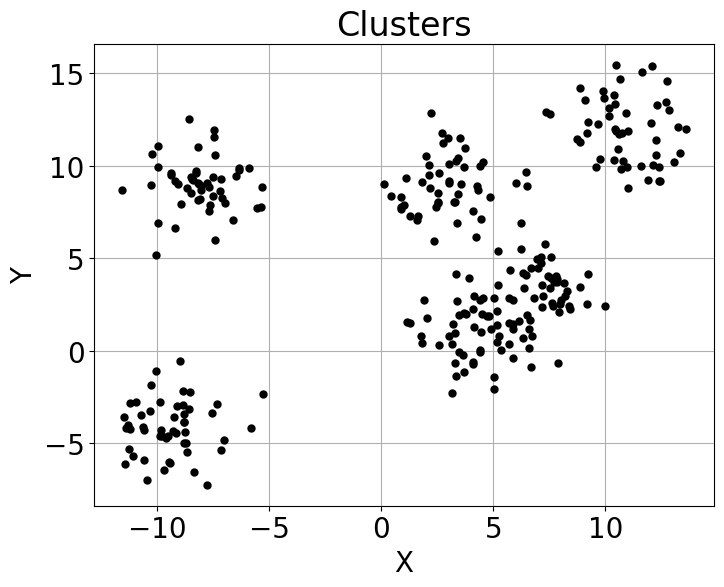

In [24]:
# data to work with 
X, Xc = cluster_generator()

plt.plot(X[:,0], X[:,1] , '.k', ms=10) 

add_plot_info()

/home/grigoris/miniconda3/envs/astrostat24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster centers:
[[ 2.99437001  8.94054431]
 [-9.41696838 -4.14659228]
 [ 5.62199416  2.06906473]
 [-8.08285781  8.9900816 ]
 [10.91316869 11.95380298]]

Real centers (6 clusters):
[3, 9]
[-8, 9]
[11, 12]
[-9, -4]
[7, 3]
[4, 1]


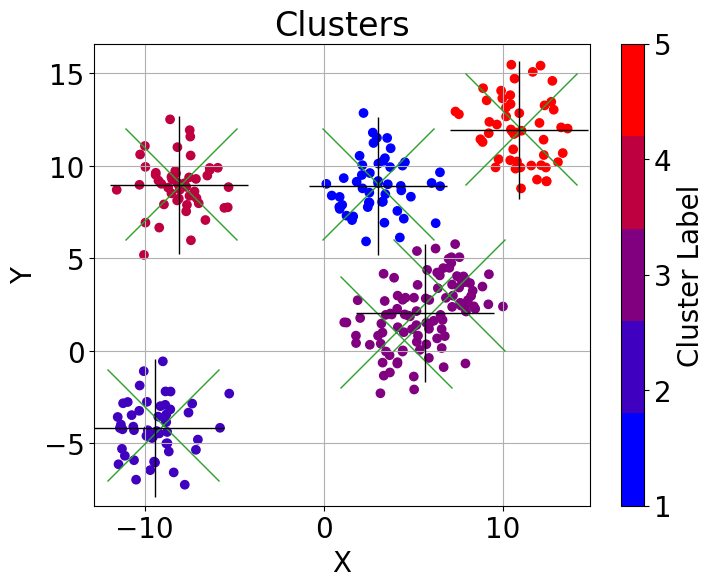

In [27]:
from sklearn.cluster import KMeans


# number of clusters -GUESS !
Clusters_kmeans = 5

# preparing the model with this number of clusters
kmeans_model = KMeans(n_clusters=Clusters_kmeans)
# fitting the model to the data
kmeans_model.fit( X )

# returning the cluster identified
print("Cluster centers:")
print(kmeans_model.cluster_centers_)

# comparing with the real ones
print()
print(f"Real centers ({len(Xc)} clusters):")
for c in Xc:
    print(c)
    plt.plot(c[0],c[1], 'x', c='tab:green', ms=80)

# coordinates of the clusters for plotting
cc_x = kmeans_model.cluster_centers_[:,0]
cc_y = kmeans_model.cluster_centers_[:,1]

# plotting the centers
plt.plot(cc_x, cc_y, 'k+', ms=100)

# plotting the datapoints color-coded according 
# to the cluster they have been assigned to
new_map = matplotlib.cm.gray.from_list('whatever', ('blue', 'red'), N=Clusters_kmeans)
scat2 = plt.scatter( X[:,0], X[:,1], c=kmeans_model.labels_, edgecolors='face', cmap=new_map)
cb = plt.colorbar(scat2, ticks=range(0,Clusters_kmeans+1,1))   # number of clusters
cb.set_ticklabels(range(1,Clusters_kmeans+2,1))
cb.set_label('Cluster Label')

add_plot_info()

plt.show()

_**Question**: How does the algorithm performs wrt your guess ?_ 

_HINT_: this highly depends on the number of clusters you input and selected by visual inspection.
<br>

<br>
<details>
<summary>Click for answer</summary>
The number of clusters definnes precisely what the algorithm will find. Moreover, if clusters are ovelapping then it is  more difficult for the algorithm to detect them. 
</details>

## How to find the best k value? - the "elbow" approach

K-means needs a certain number of clusters to run. Therefore, our selection affects our interpretation (and any potential discoveries!). So, how can we improve (automatically) the selection of clusters that the K-means algorithm will search for?

One answer can be given through the "elbow method". This method is based on the following process:

1. Running the algorithm for a range of different clusters k (from 1 up to a maximum number).

2. Calculating the 'inertia' for each k choice. 

3. Plotting the above quantity as a function of k:

4. Identifying the 'elbow' point in the plot, i.e., the point on the graph where the rate of decrease significantly slows down. This indicates that adding more clusters beyond this point does not substantially reduce inertia, and thus, we do not gain much.

5. The k value corresponding to this point is considered the optimal choice.

&#9755; _This method does not always provide a clear answer, especially if the dataset does not exhibit well-defined clusters or if they have different sizes and densities. There are other metrics that we will see at the end of this notebook._

_Note: we are using the latest X dataset (from the previous set). You may see different results from others!_

In [28]:
from sklearn import metrics

inert = []
xclusters = range(2,14)
for i in xclusters:
    print(f'-- working with {i} clusters...')
    kmeans_model = KMeans(n_clusters=i, random_state=0, n_init='auto')
    kmeans_model.fit(X)
    inert.append(kmeans_model.inertia_)

-- working with 2 clusters...
-- working with 3 clusters...
-- working with 4 clusters...
-- working with 5 clusters...
-- working with 6 clusters...
-- working with 7 clusters...
-- working with 8 clusters...
-- working with 9 clusters...
-- working with 10 clusters...
-- working with 11 clusters...
-- working with 12 clusters...
-- working with 13 clusters...


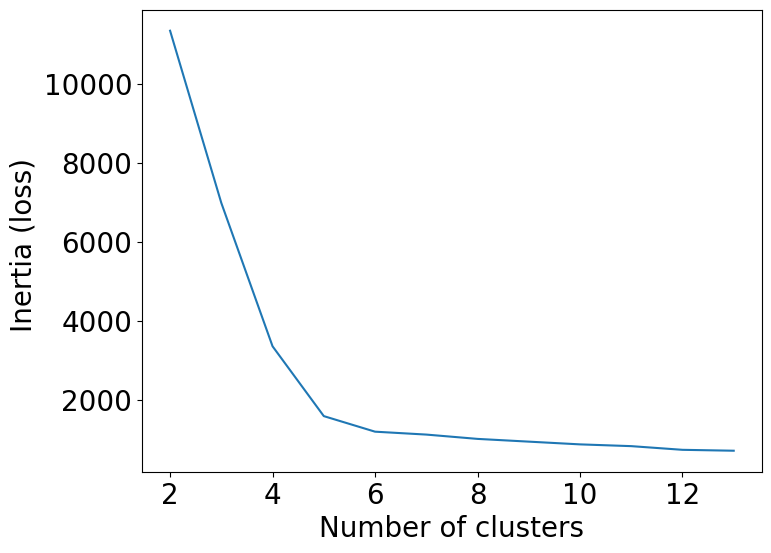

In [29]:
plt.plot( xclusters, inert)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (loss) ')
plt.show()

## Selecting a tool - the DBSCAN algorithm

The DBSCAN (Density Based Spatial Clustering of Applications with Noise) algorithm views clusters as areas of high density separated by areas of low density. Thus, clusters found by DBSCAN can be of any shape - as opposed to other algorithms (K-means for example) which assume that clusters are convex shaped.

It uses 2 parameters:
* $eps$ : neighborhood size
* $minPts$ : minimum number of points for a neighborhood to be considered dense

With a **sinlge scan** we can label the points as: core, border, noise. How?

-  A point $p$ is defined **core** if at least $minPts$ points are within the area defined by $eps$ (including itself).
-  A **border** point is a non-core point that has at least one core point in its neighborhood
-  A **noise** point is neither a core nor a border point. There represent outliers in the data set


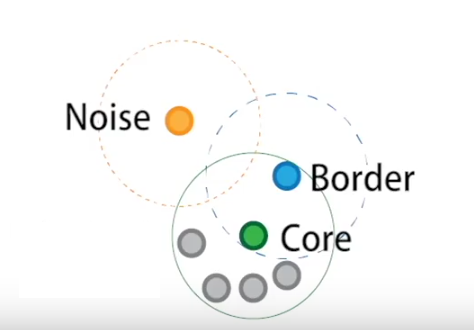

<center>
 Figure 2.1. Definition of core, border, and noise points, according to DBSCAN,<br>
(Credit: <a href="https://arogozhnikov.github.io/2017/07/10/opera-clustering.html"  target="_blank" rel="noopener noreferrer">Clustering applied to showers in the OPERA, by Alex Rogozhnikov</a>)    
</center>

Having defined these points, DBSCAN operates as follows:

**Steps:**

1. The algorithm selects a core point that has not been explored.

2. It finds the points that are within an `eps` distance from this point and examines them.

3. If these points are also core points, it examines their `eps`-neighborhood, expanding the cluster.

4. The above process is applied recursively to all points (core points and border points), further expanding the cluster it is examining until all points it has visited are exhausted.

5. When these points are exhausted, it selects the next unvisited core point (in another cluster) and continues the previous process.

6. The process ends when all points have been assigned to a cluster or identified as noise.


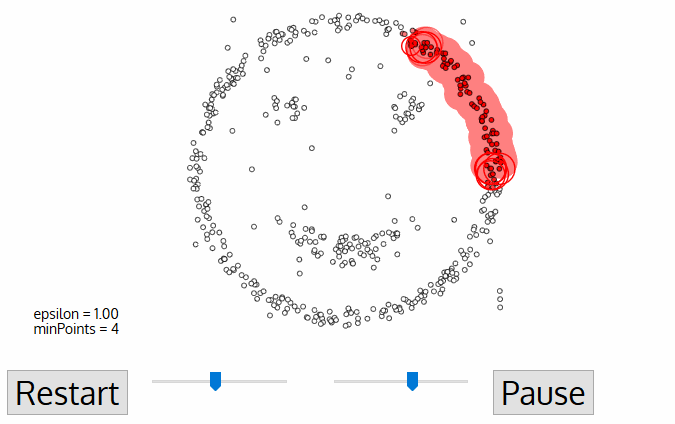

<center>
 Figure 2.2. An example of how it constructs clusters (right).<br>
(Credit: <a href="https://arogozhnikov.github.io/2017/07/10/opera-clustering.html"  target="_blank" rel="noopener noreferrer">Clustering applied to showers in the OPERA, by Alex Rogozhnikov</a>)    
</center>

**Complexity**

$O(n^2)$, where n is the number of points. 

**Pros**
- Any number of clusters
- Clusters of varying size and shape
- Finds and ignores outliers

**Cons**
- Relatively slow
- Extremely sensitive to parameters choice
- In rare cases, border points move to an other cluster when DBSCAN is re-run
- Serious troubles with clusters with varying density<br>
  *(OPTICS and HDBSCAN are variations which address this problem)*

### Example use of DBSCAN

In the following example we artificially create two groups of data and we use the DBSAN algorithm.

**Creating some data**

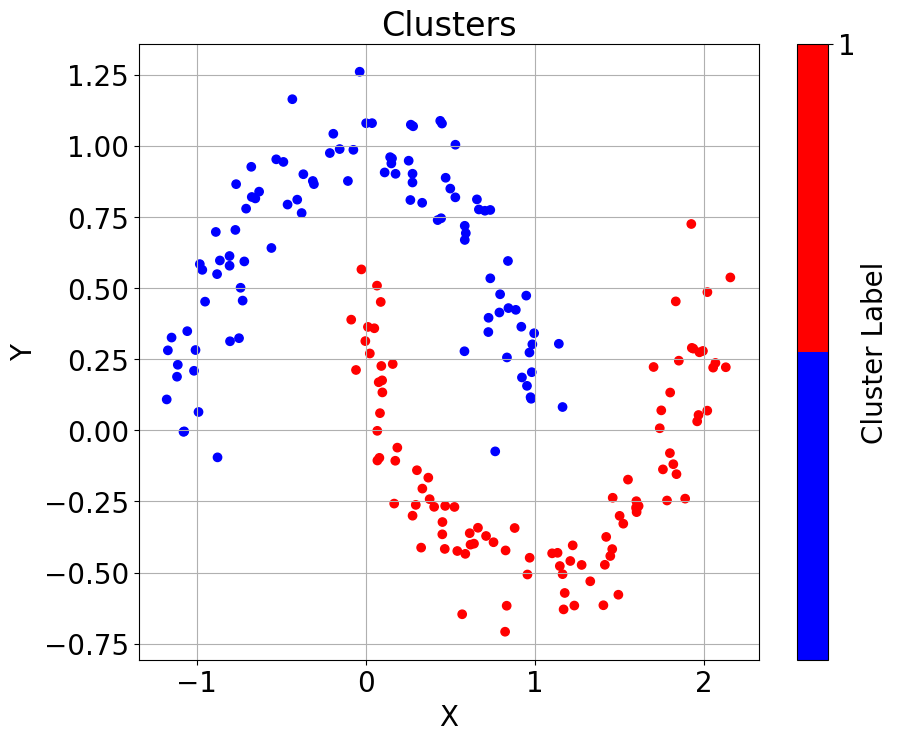

In [32]:
# imports and some handy function

import numpy as np
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = [10, 8]

def add_plot_info():
    """Just add some information for the plot"""
    plt.title('Clusters')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)

    
# import this to create some fancy data
from sklearn.datasets import make_moons

# Generate synthetic data (moons dataset)
Xd, y = make_moons(n_samples=200, noise=0.1, random_state=2024)

num_classes = len(set(y))
new_map = matplotlib.cm.gray.from_list('clastering', ('blue', 'red'), N=num_classes)
scat2 = plt.scatter( Xd[:,0], Xd[:,1], c=y, 
                    edgecolors='face', cmap=new_map)
cb = plt.colorbar(scat2, ticks=range(1,num_classes+2,1))   # number of clusters
cb.set_ticklabels(range(1,num_classes+2,1))
cb.set_label('Cluster Label')

add_plot_info()    



What we should see if we combine into one dataset.

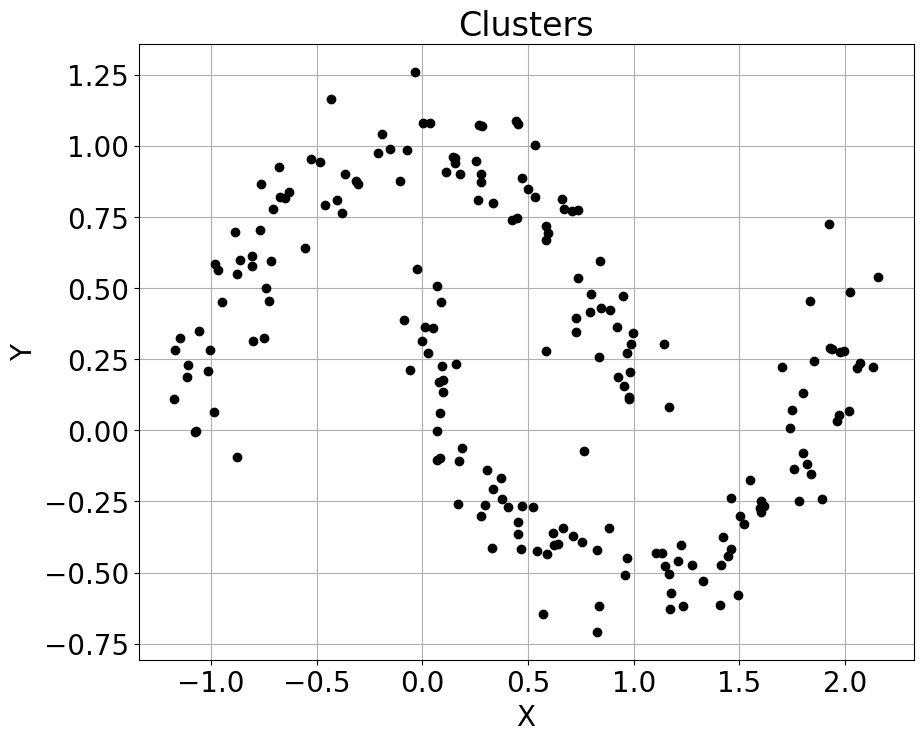

In [33]:
plt.plot(Xd[:,0], Xd[:,1], 'ok') 

add_plot_info()    


**Implementation**

We will use [`sklearn.cluster.DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN). The most important parameters of course are `eps` and `min_samples`.

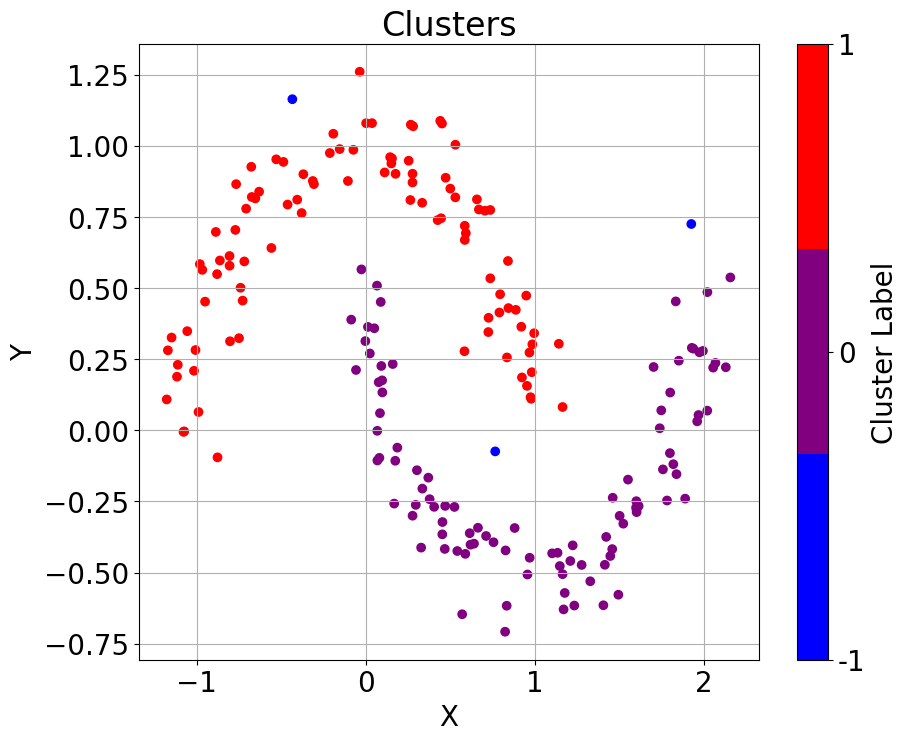

In [35]:
from sklearn.cluster import DBSCAN

# define the model first
dbscan = DBSCAN(eps=0.22, min_samples=5)
# fit the data
dbscan.fit(Xd)

# visualize the predictions
num_classes = len(set(dbscan.labels_))
new_map = matplotlib.cm.gray.from_list('clustering', ('blue', 'red'), N=num_classes)
scat2 = plt.scatter( Xd[:,0], Xd[:,1], c=dbscan.labels_, 
                    edgecolors='face', cmap=new_map)
cb = plt.colorbar(scat2, ticks=range(-1,num_classes,1))   # number of clusters
cb.set_ticklabels(range(-1,num_classes,1))
cb.set_label('Cluster Label')

add_plot_info()    


### Question: which parameters are optimal ?

In order to identify the two clusters play around with the `eps` and `mins_sample`. 

_HINT: suggested ranges 0.05 -- 0.30, 2 -- 7, respectively_


_NOTE: the group of points with -1 indicate noise._


<br>
<details>
    <summary>A good pair...</summary>
eps=0.22 <br>
mins_sample=5
</details>

## Comparing the two algorithms

Let's now check if K-means is able to recover the clusters. It is kind of obvious what should be the number of clusters... 

/home/grigoris/miniconda3/envs/astrostat24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


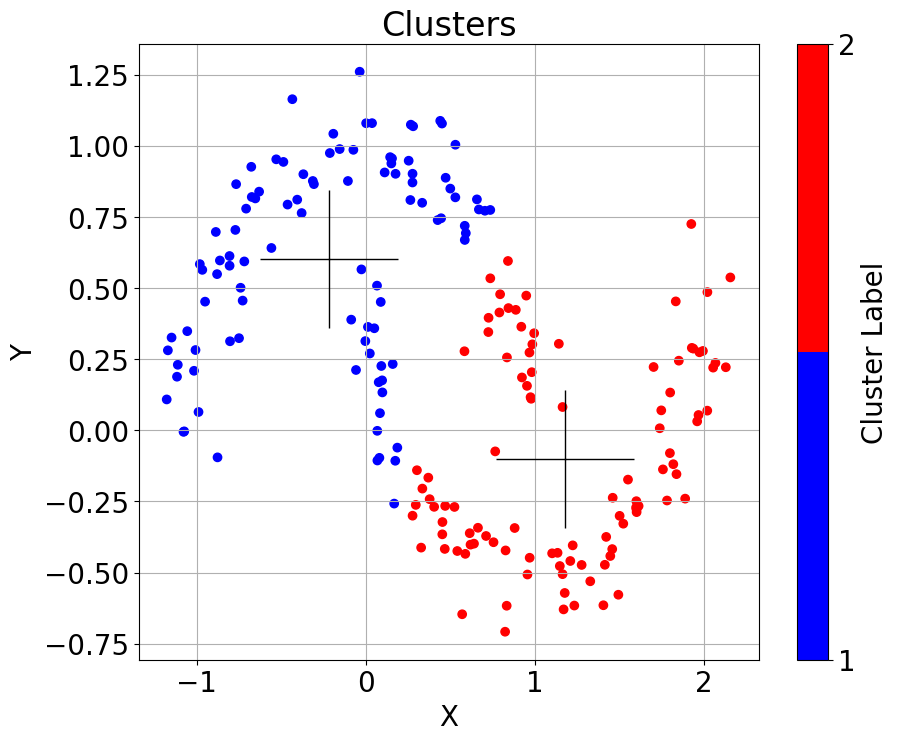

In [36]:
# number of clusters
Clusters_kmeans = 2

# preparing the model with this number of clusters
kmeans_model = KMeans(n_clusters=Clusters_kmeans)
# fitting the model to the data
kmeans_model.fit( Xd )

# coordinates of the clusters for plotting
cc_x = kmeans_model.cluster_centers_[:,0]
cc_y = kmeans_model.cluster_centers_[:,1]

# plotting the centers
plt.plot(cc_x, cc_y, 'k+', ms=100)

# plotting the datapoints color-coded according 
# to the cluster they have been assigned to
new_map = matplotlib.cm.gray.from_list('whatever', ('blue', 'red'), N=Clusters_kmeans)
scat2 = plt.scatter( Xd[:,0], Xd[:,1], c=kmeans_model.labels_, edgecolors='face', cmap=new_map)
cb = plt.colorbar(scat2, ticks=range(0,Clusters_kmeans+1,1))   # number of clusters
cb.set_ticklabels(range(1,Clusters_kmeans+2,1))
cb.set_label('Cluster Label')

add_plot_info()

plt.show()

### What would you comment regarding the performance of K-means instead of DBSCAN?

<br>
<details>
    <summary>Think a bit before clicking here...</summary>
Obviously, K-means algorithm is able to find two clusters. However, as its approach is best optimized for isotropic clusters so it fails due to their shape. 
</details>

# Clustering algorithms overview

We start by presenting a set of [**sklearn clustering**](http://scikit-learn.org/stable/modules/clustering.html) algorithms with toy datasets, and then we continue by applying some of them in various astrophyiscal datasets.

This serves as a showcase of the available methods and how they compare. You can easily adapt any of these methods to the following examples or your own problems.

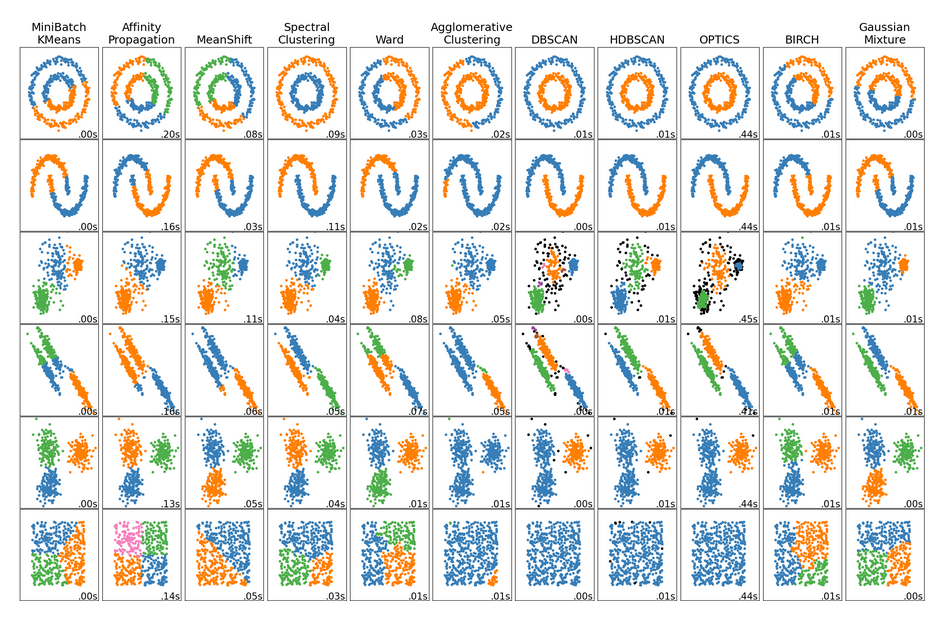

<center>
 Figure 3.1. A comparison of the clustering algorithms in scikit-learn.<br>
(Credit: <a href="https://scikit-learn.org/stable/modules/clustering.html"  target="_blank" rel="noopener noreferrer">Overview of clustering methods, scikit-learn API</a>)    
</center>


## Quiz time: take a few moments and explore the results - what do you notice? 

Really... write down some points here:

- point 1
- point 2




NOTE: The last dataset is an example of a 'null' situation for clustering, i.e. the data is homogeneous. 


## Some take-away points

<br>
<details>
    <summary> An indicative list: </summary>
<ul>
    <li> There is not a single best algorithm. 
    <li> Not all the algorithms identify the same number of clusters.
    <li> Some algorithms are better to detect arbitrary cluster shapes than others.
    <li> Some algorithms can be faster.
    <li> The intuitive clustering might not apply to very high dimensional data.
</ul>
</details>

# Exercise: Classify Star-forming objects in a BPT diagram

The "Baldwin, Phillips & Terlevich" (BPT) diagrams are used to distinguish sources based on specific spectral emission lines. The strengths of these lines depend on the heating source (see e.g. [BPT diagram, NED](https://ned.ipac.caltech.edu/level5/Glossary/Essay_bpt.html)).

BPTs allow to distinguish:
- AGNs (Seyfert)
- LINERs
- Star-forming galaxies
- Composite objects

<center><img src="images/BPT.png"> 
Figure 4.1. Example of classification via BPT diagram.<br> Theoretical or observationally-calibrated curves allow to distinguish the different subpopulations.<br>
(From <a href="https://ui.adsabs.harvard.edu/abs/2010ApJ...720..555P/abstract" target="_blank" rel="noopener noreferrer"> Parra et al. (2010), ApJ, 720, 555</a>)</center>

## The sample

We will use the data by [Stampoulis et al. (2019), MNRAS, 485, 1085](https://ui.adsabs.harvard.edu/abs/2019MNRAS.485.1085S/abstract), which provides the OIII, NII, SII, and OI diagnostics for ~130 000 objects.

The work also gives classifications, which we will use as a reference.

--- 

**TASK**: Find the best clustering algorithm for separating star-forming objects

**CHALLENGE**: Consult the sklearn's pages to tune more hyperparameters!

## Loading and setting up the data

In [37]:
import numpy as np

# CREATING DATA STRUCTURE

# > Loading the emission line data and classifications from Stampoulis+19:

PATH_Stampoulis_data = "data/Stampoulis+19_Table_2.csv"

data = np.genfromtxt(PATH_Stampoulis_data, delimiter=",")
# The data file is organized in 138799 lines (i.e. different objects), and 12 columns

# To check file dimensions:
# print(data.shape)

ID               = data[:,0]  # object ID
NII_diagnostic   = data[:,3]  # log10 ( NII_6584  / H_alpha )
SII_diagnostic   = data[:,4]  # log10 ( SII_6717  / H_alpha )
OI_diagnostic    = data[:,5]  # log10 ( OI        / H_alpha )
OIII_diagnostic  = data[:,6]  # log10 ( OIII_5007 / H_beta )

labels = np.genfromtxt(PATH_Stampoulis_data, delimiter=',', usecols=-1, dtype=str)
# reading labels from last column
# Activity class labelling scheme:
#   0 <-> SFG (Star Forming Galaxy)
#   1 <-> SEY (Seyfert)
#   2 <-> LIN (LINER)
#   3 <-> COM (Composite)

# Dictionary containg class name and associated label:
from collections import OrderedDict
classes = OrderedDict()
classes["SFG"] = 0
classes["SEY"] = 1
classes["LIN"] = 2
classes["COM"] = 3

labels = [int(float(label)) for label in labels]
# converting labels from strings to integers

# > Organizing data in an analysis-ready fashion:
X_sample = np.stack((OIII_diagnostic,NII_diagnostic,SII_diagnostic,OI_diagnostic),axis=-1)
y_sample = labels

We will use only 1 every "sampling_factor" objects for two reasons:

- to speed up the exercise
- to avoid crashes due to memory limitations.

You can try to use the full sample when confident with the setup (and your computer power!).

In [38]:
# SUGGESTION: Use only 1 every <sampling_factor> objects 

sampling_factor = 50
# sample 1 every <sampling_factor> data to avoid computational delay

X = X_sample[::sampling_factor]
y = y_sample[::sampling_factor]

print('Sample shape:')
print("_____________________________________")
print('  X  | ' + str(X.shape))
print('     | ' + str(X.shape[0]) + ' samples x ' + str(X.shape[1]) + ' diagnostics' )
print("-----|-------------------------------")
print('  y  | ' + str(len(y)) + ' labels')

Sample shape:
_____________________________________
  X  | (2616, 4)
     | 2616 samples x 4 diagnostics
-----|-------------------------------
  y  | 2616 labels


Although available, we will not use the labels for the analysis, but only for the first representation of the data.

## Visualizing the data
Essentially reproducing Figure 5 in Stampoulis+ 2019

/tmp/ipykernel_268550/1998083827.py:32: RuntimeWarning: divide by zero encountered in divide
  ke01_NII = 0.61 / (x1-0.05) + 1.3   # Kewley+01
/tmp/ipykernel_268550/1998083827.py:33: RuntimeWarning: divide by zero encountered in divide
  ka03_NII  = 0.61 / (x2-0.47) + 1.19 # Kuffmann+03


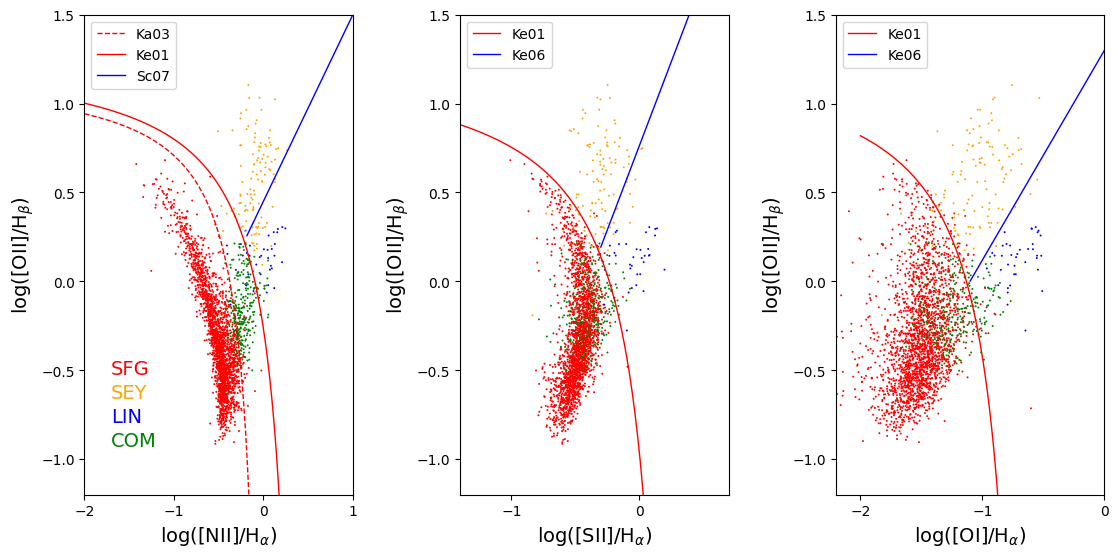

In [39]:
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
from matplotlib import colors

# Limit scatter plots (not histograms) in showing a maximum of <N_plot> objects:
# for full sample size, use: N_plot = len(X)
N_plot = 5000
# NOTE: reducing the sample in the plot helps visualizing the density

# Creating a colormap where:
#   red    <-> SFG
#   yellow <-> SEY
#   blue   <-> LIN
#   green  <-> COM
cmap = mpl.colors.ListedColormap(['red','orange','blue','green'])

# Remember that the sample X is organized as:
#  X[:,0] <-> OIII_diagnostic
#  X[:,1] <-> NII_diagnostic
#  X[:,2] <-> SII_diagnostic
#  X[:,3] <-> OI_diagnostic


# PLOT THE DIAGNOSITCS

# > Classification lines
#   NII:
x1 = np.linspace(-2, 0.05, 100)
x2 = np.linspace(-2, 0.47, 100)
x3 = np.linspace(-0.1839, 1)
ke01_NII = 0.61 / (x1-0.05) + 1.3   # Kewley+01
ka03_NII  = 0.61 / (x2-0.47) + 1.19 # Kuffmann+03
sc07_NII  = 1.05 * x3 + 0.45        # Schawinski+07
#   SII:
x4 = np.linspace(-2, 0.05, 100)
x5 = np.linspace(-0.3, 1)
ke01_SII  = 0.72 / (x4-0.32) + 1.3  # Kewley+01
ke06_SII  = 1.89 * x5 + 0.76        # Kewley+06
#   OI:
x6 = np.linspace(-2, -0.8, 100)
x7 = np.linspace(-1.1, 0)
ke01_OI = 0.72 / (x6+0.59) + 1.33  # Kewley+01
ke06_OI = 1.18 * x7 + 1.30         # Kewley+06

fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0, left=0.1, right=0.95, wspace=0.4)

ylim = [-1.2,1.5] # OIII_diagnostic range

# > left plot

xlim = [-2,1] # NII_diagnostic range

ax = fig.add_subplot(131)
im = ax.scatter(X[:, 1], X[:, 0], c=y, s=2, lw=0, cmap=cmap, zorder=2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.set_xlabel('log([NII]/H$_{α})$', fontsize=14)
ax.set_ylabel('log([ΟII]/H$_{β})$', fontsize=14)
#
ax.plot(x1, ka03_NII, "--", color='red',  linewidth = 1.0, label='Ka03')
ax.plot(x2, ke01_NII, "-",  color='red',  linewidth = 1.0, label='Ke01')
ax.plot(x3, sc07_NII, "-",  color='blue', linewidth = 1.0, label='Sc07')
ax.legend()

# legend:
ax.text(0.1,0.25, "SFG", color='red',    transform=ax.transAxes, fontsize=14)
ax.text(0.1,0.20, "SEY", color='orange', transform=ax.transAxes, fontsize=14)
ax.text(0.1,0.15, "LIN", color='blue',   transform=ax.transAxes, fontsize=14)
ax.text(0.1,0.10, "COM", color='green',  transform=ax.transAxes, fontsize=14)

# > central plot

xlim = [-1.4,0.7] # SII_diagnostic range

ax = fig.add_subplot(132)
im = ax.scatter(X[-N_plot:, 2], X[-N_plot:, 0], c=y[-N_plot:], s=2, lw=0, cmap=cmap, zorder=2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.set_xlabel('log([SII]/H$_{α})$', fontsize=14)
ax.set_ylabel('log([ΟII]/H$_{β})$', fontsize=14)
#
ax.plot(x4, ke01_SII, "-",  color='red',  linewidth = 1.0, label='Ke01')
ax.plot(x5, ke06_SII, "-",  color='blue', linewidth = 1.0, label='Ke06')
ax.legend()


# > right plot

xlim = [-2.2,0.0] # OI_diagnostic range

ax = fig.add_subplot(133)
im = ax.scatter(X[-N_plot:, 3], X[-N_plot:, 0], c=y[-N_plot:], s=2, lw=0, cmap=cmap, zorder=2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.set_xlabel('log([OI]/H$_{α})$', fontsize=14)
ax.set_ylabel('log([ΟII]/H$_{β})$', fontsize=14)
#
ax.plot(x6, ke01_OI, "-",  color='red',  linewidth = 1.0, label='Ke01')
ax.plot(x7, ke06_OI, "-",  color='blue', linewidth = 1.0, label='Ke06')
ax.legend()


plt.show()

# NOTE: Ignore the warning, due to the plotting of the lines

## Running clustering algorithms and plotting

_Note: keep your breath a bit for the metrics definition below..._

In [40]:
def mtrcs( myX, algo_labels):  
    sil = metrics.silhouette_score( myX, algo_labels, metric='euclidean')
    ch = metrics.calinski_harabasz_score( myX, algo_labels )    
    db = metrics.davies_bouldin_score( myX, algo_labels)
    
    return sil, ch, db 

import time
from sklearn import metrics

#from sklearn.neighbors import kneighbors_graph

from sklearn import cluster, mixture
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from collections import defaultdict
from sklearn.neighbors import kneighbors_graph

import warnings
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

**Setting up clustering parameters** 

_HINTS_:

- check the [**sklearn clustering**](http://scikit-learn.org/stable/modules/clustering.html) algorithms summary
- select values from the suggested ranges
- `n_clusters` is the most critical parameters for most of them
- remember what the exercise asked when interpreting results



In [43]:
params = {'quantile': .08,         # range: 0.02-1  | MeanShift 
            'eps': .4,             # range: 0.01-5  | DBSCAN
            'damping': .9,         # range: [0.5-1)      | AffinityPropagation
            'preference': -600,    # range: -1000 - 1000 | AffinityPropagation
            'n_clusters': 2}       # range: ???  | KMeans, Ward, 
                                   #             | AgglomerativeClustering, 
                                   #             | SpectralClustering, 
                                   #             | Birch, GaussianMixture

/home/grigoris/miniconda3/envs/astrostat24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/grigoris/miniconda3/envs/astrostat24/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


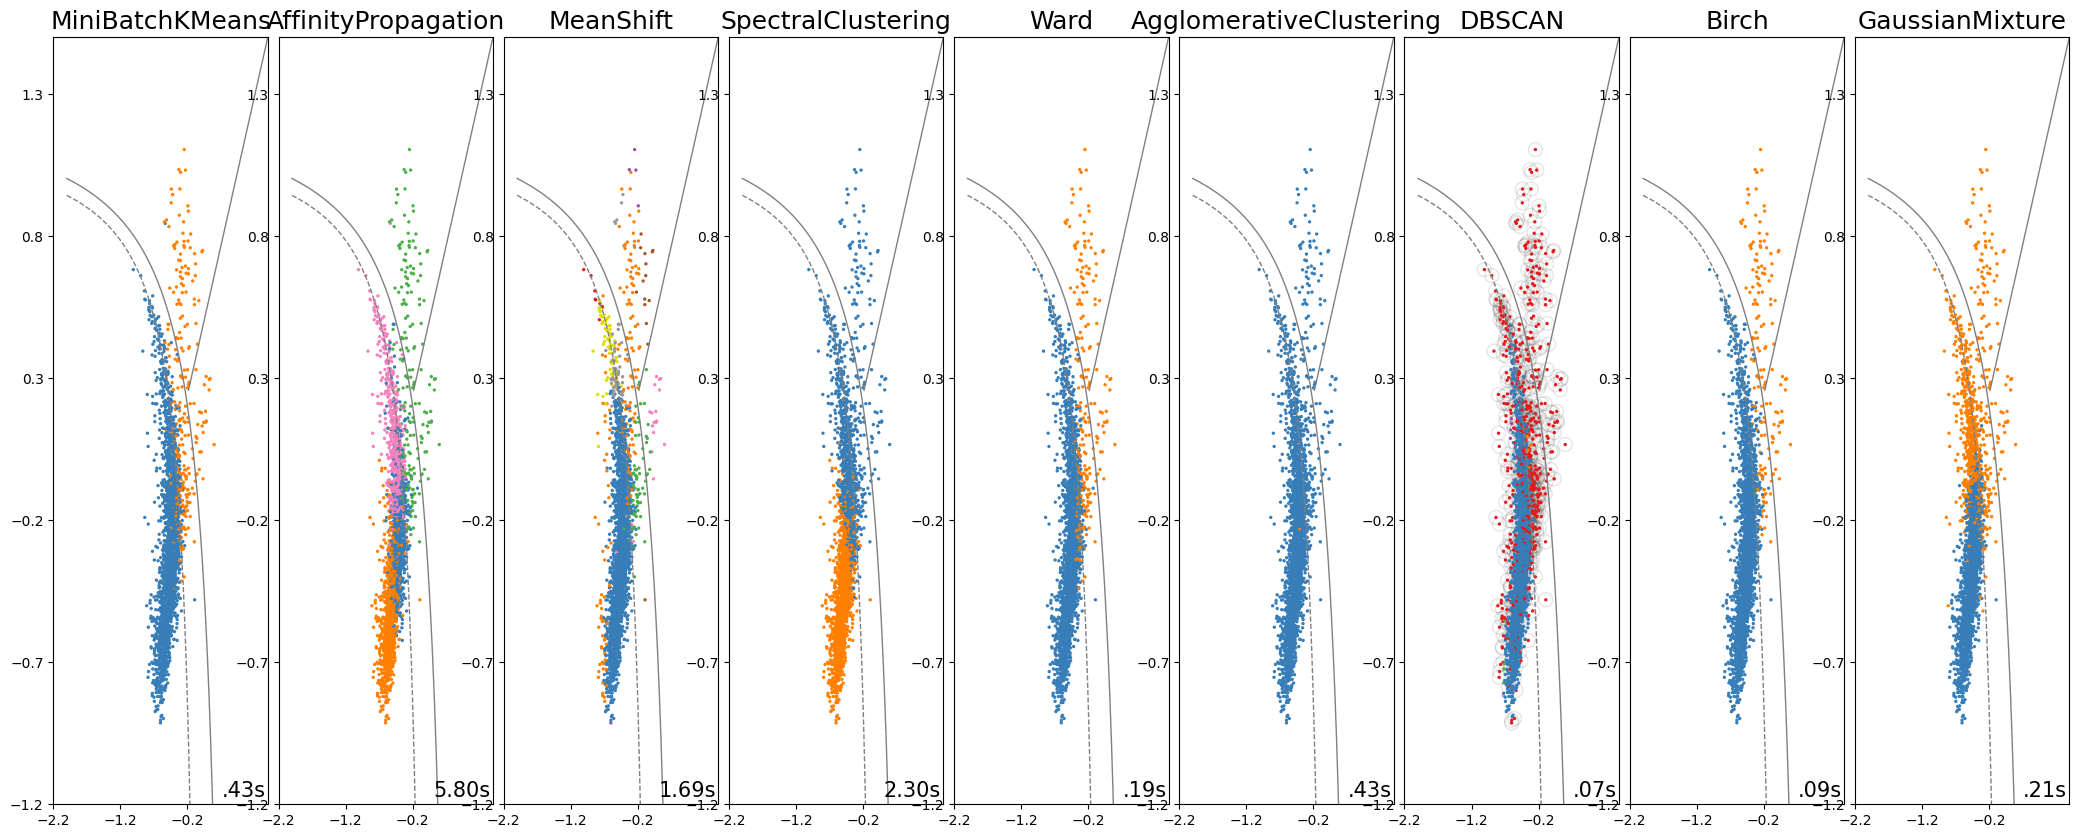

In [44]:
plt.figure(figsize=(9 * 2 + 3, 8))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

# normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(X)

# estimate bandwidth for mean shift
bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

# connectivity matrix for structured Ward
connectivity = kneighbors_graph(
    X, n_neighbors= 10 , include_self=False) # n_neighbors=params['n_neighbors']
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)

# ============
# Create cluster objects
# ============
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
k_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
ward = cluster.AgglomerativeClustering(
    n_clusters=params['n_clusters'], linkage='ward',
    connectivity=connectivity)
average_linkage = cluster.AgglomerativeClustering(
    linkage="average", affinity="cityblock",
    n_clusters=params['n_clusters'], connectivity=connectivity)
complete_linkage = cluster.AgglomerativeClustering(
    linkage="complete", affinity="cityblock",
    n_clusters=params['n_clusters'], connectivity=connectivity)
spectral = cluster.SpectralClustering(
    n_clusters=params['n_clusters'], eigen_solver='arpack',
    affinity="nearest_neighbors")
dbscan = cluster.DBSCAN(eps=params['eps'])
affinity_propagation = cluster.AffinityPropagation(
    damping=params['damping'], preference=params['preference'])
birch = cluster.Birch(n_clusters=params['n_clusters'])
gmm = mixture.GaussianMixture(
    n_components=params['n_clusters'], covariance_type='full')

clustering_algorithms = (
    ('MiniBatchKMeans', k_means),
    ('AffinityPropagation', affinity_propagation),
    ('MeanShift', ms),
    ('SpectralClustering', spectral),
    ('Ward', ward),
    ('AgglomerativeClustering', average_linkage),
    ('DBSCAN', dbscan),
    ('Birch', birch),
    ('GaussianMixture', gmm)
)

# restoring normalization for plotting
X_plot = X_sample[::sampling_factor]

all_scores = defaultdict(list)
for name, algorithm in clustering_algorithms:
    t0 = time.time()

    # catch warnings related to kneighbors_graph
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the " +
            "connectivity matrix is [0-9]{1,2}" +
            " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning)
        warnings.filterwarnings(
            "ignore",
            message="Graph is not fully connected, spectral embedding" +
            " may not work as expected.",
            category=UserWarning)
        algorithm.fit(X)

    t1 = time.time()
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(int)
    else:
        y_pred = algorithm.predict(X)
        
    plt.subplot(1, len(clustering_algorithms), plot_num)
    plt.title(name, size=18)

    plt.plot(x1, ka03_NII, "--", color='grey',  linewidth = 1.0, label='Ka03')
    plt.plot(x2, ke01_NII, "-",  color='grey',  linewidth = 1.0, label='Ke01')
    plt.plot(x3, sc07_NII, "-",  color='grey', linewidth = 1.0, label='Sc07')
    
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X_plot[:, 2], X_plot[:, 0], s=2, color=colors[y_pred])
    plt.scatter(X_plot[y_pred==-1,2], X_plot[y_pred==-1,0], s=100, facecolors='none', edgecolors='black', color='black', label='background', alpha=0.1, zorder=0)
    # marking background class for DBSCAN

    plt.gca().set_xlim(-2,1)     # NII_diagnostic range
    plt.gca().set_ylim(-1.2,1.5) # OIII_diagnostic range

    plt.xticks(np.arange(xlim[0], xlim[1], step=1))
    plt.yticks(np.arange(ylim[0], ylim[1], step=0.5))

    plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
             transform=plt.gca().transAxes, size=15,
             horizontalalignment='right')
    plot_num += 1
    
    all_scores[name].append(mtrcs(X_plot,y_pred ))


plt.show()

## Question: Which algorithm performs best?

_HINT: remember the question asked!_
<br>
<details>
<summary>Click for answer</summary>
The Ward algorithm seems to be the best in separating Star-Forming Galaxies.

Other algorithms (e.g. Affinity Propagation) might be considered valid if we join some clusters.
</details>


## Metrics for blind selection of cluster number

Now, given that we do not know anything apriori for the numbers of clusters, there are some metrics that can used to determine the performance in each case. 

### Silhouette Score

Using the distances between the points in the same cluster and theirs with all other points in the next nearer cluster:

$$ s = \frac{b - a}{max(a,b)} $$ 

where a corresponds to the mean distance between a sample and all other samples _within the same cluster_, while b is the mean distance of a sample (in the examined cluster) with all other points in the _next nearest cluster_. 

&#10509; A **higher** value indicates better performance (-1...1).

### Calinski-Harabasz Index

Similar to the silhouette score, but using the ratio of the sum of dispersion of the samples within each cluster and the dispersion of the clusters in total. For a set of data $E$ of size $n_E$ which has been clustered into $k$ clusters, it is defined as:

$$ s = \frac{tr(B_k)}{tr(W_k)} \times \frac{n_E-k}{k-1} $$

where $tr(B_k)$ is the trace of the between group dispersion matrix, and $tr(W_k)$ the trace of the within-cluster dispersion matrix, defined as:

$$ W_k = \sum_{q=1}^{K} \sum_{x \in C_q} (x - c_q)(x - c_q)^T \\
 B_k = \sum_{q=1}^{k} n_q(c_q-c_E)(c_q-c_E)^T $$
 
with $C_q$ the set of points in cluster $q$, $c_q$ the center of cluster $q$, $c_E$ the center of $E$, and $n_q$ the number of points in cluster $q$.  

&#10509; A **higher** value indicates better performance (denser and well separated clusters). 

### Davies-Bouldin Index

It is an index that calculates the 'similarity' between clusters, and actually measures how the distance between clusters compares with the sizes of the clusters themselves.  

$$ DB = \frac{1}{k} \sum_{i=1}^{k} \max_{i \neq j} R_{ij} $$

where $R_{ij} = \frac{s_i+s_j}{d_{ij}}$ corresponds to the similarity measurement, $s_i$ is the average distance between each point of cluster $i$ and the centroid of that cluster (diameter), and $d_{ij}$ is the distance between cluster centroids $i$ and $j$. The form chosen for $R_{ij}$ is a nonnegative and symmetric. 

&#10509; A **lower** value (closer to 0) indicate better performance.

---

You can (should!) check [sklearn's clustering metrics page](https://scikit-learn.org/stable/modules/clustering.html) for more details regarding the drawbacks and advantages of each metric.

In [45]:
print('ALGORITHM: Silhouette Score -- Calinski-Harabasz Index -- Davies-Bouldin Index  ')
print('='*80)
for algo, scores in all_scores.items():
    print(f'{algo:<26}: {" -- ".join([f"{s:7.2f}" for s in scores[0]])}')

ALGORITHM: Silhouette Score -- Calinski-Harabasz Index -- Davies-Bouldin Index  
MiniBatchKMeans           :    0.43 --  984.77 --    1.00
AffinityPropagation       :    0.29 -- 1457.97 --    1.05
MeanShift                 :    0.14 --  181.90 --    1.22
SpectralClustering        :    0.36 -- 1483.68 --    1.16
Ward                      :    0.43 --  894.78 --    1.00
AgglomerativeClustering   :    0.78 --   29.44 --    0.16
DBSCAN                    :   -0.27 --   57.45 --    2.22
Birch                     :    0.52 --  871.63 --    0.78
GaussianMixture           :    0.38 -- 1306.84 --    1.26


## Question: Which algorithm performs best according to the metrics?
<br>
<details>
<summary>Click for answer</summary>
In this case it seems that Agglomerative is the best according to the silhouette score and Davies-Bouldin Index. This looks different from our 'visual' metric but those indeces can catch more details.
    
However, when examining the Calinski-Harabasz Index other algorithms seem to perform better (Spectral, Affinitiy, MiniBatchKMeans). This highlights that the problem is complex and more careful and detaild work is needed. 
</details>


# Further notes / resources

For the description of some other algorithms as well as some applications in astrophysical problems, take a look at the [Summer School for Astrostatistics 2022 material](https://github.com/astrostatistics-in-crete/2022_summer_school).

In [ ]:
# EOF